In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sayantikalaskar","key":"9c46cbc3dc0f3d53e9eef348359a288e"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d rohanrao/nifty50-stock-market-data

Dataset URL: https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data
License(s): CC0-1.0
 92% 17.0M/18.4M [00:02<00:00, 14.7MB/s]
100% 18.4M/18.4M [00:02<00:00, 7.32MB/s]


In [5]:
!unzip nifty50-stock-market-data.zip

Archive:  nifty50-stock-market-data.zip
  inflating: ADANIPORTS.csv          
  inflating: ASIANPAINT.csv          
  inflating: AXISBANK.csv            
  inflating: BAJAJ-AUTO.csv          
  inflating: BAJAJFINSV.csv          
  inflating: BAJFINANCE.csv          
  inflating: BHARTIARTL.csv          
  inflating: BPCL.csv                
  inflating: BRITANNIA.csv           
  inflating: CIPLA.csv               
  inflating: COALINDIA.csv           
  inflating: DRREDDY.csv             
  inflating: EICHERMOT.csv           
  inflating: GAIL.csv                
  inflating: GRASIM.csv              
  inflating: HCLTECH.csv             
  inflating: HDFC.csv                
  inflating: HDFCBANK.csv            
  inflating: HEROMOTOCO.csv          
  inflating: HINDALCO.csv            
  inflating: HINDUNILVR.csv          
  inflating: ICICIBANK.csv           
  inflating: INDUSINDBK.csv          
  inflating: INFRATEL.csv            
  inflating: INFY.csv                
  inflatin

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [7]:
import pandas as pd
df=pd.read_csv('/content/BHARTIARTL.csv',na_values=['null'],
               index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

<ipython-input-7-29c64c68d38a>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv('/content/BHARTIARTL.csv',na_values=['null'],


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2002-02-18,BHARTI,EQ,0.00,51.90,51.90,43.50,44.70,44.35,46.00,10381190,4.775431e+13,NaN,6503775.0,0.6265
2002-02-19,BHARTI,EQ,44.35,45.15,45.15,41.30,41.35,41.70,42.58,3552660,1.512609e+13,NaN,1741184.0,0.4901
2002-02-20,BHARTI,EQ,41.70,40.60,42.80,40.25,41.20,41.25,41.56,2512964,1.044348e+13,NaN,NaN,NaN
2002-02-21,BHARTI,EQ,41.25,42.85,43.40,42.15,42.20,42.40,42.76,1338196,5.722681e+12,NaN,485969.0,0.3632
2002-02-22,BHARTI,EQ,42.40,42.65,43.60,41.10,43.35,43.30,42.75,811327,3.468413e+12,NaN,399133.0,0.4920


<Axes: xlabel='Date'>

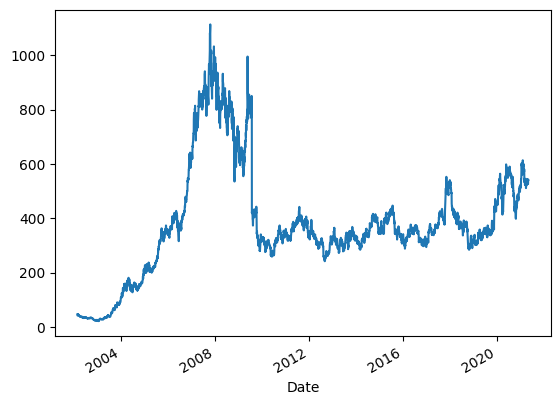

In [8]:
df["VWAP"].plot()

In [9]:
#Set Target Variable
output_var = pd.DataFrame(df['VWAP'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2002-02-18,0.027678,0.026062,0.021363,0.053130
2002-02-19,0.021612,0.020256,0.019306,0.018087
2002-02-20,0.017523,0.018235,0.018325,0.012751
2002-02-21,0.019545,0.018751,0.020101,0.006723
2002-02-22,0.019366,0.018923,0.019119,0.004019


In [11]:
feature_transform.shape

(4774, 4)

In [12]:
from sklearn.model_selection import TimeSeriesSplit
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10) # 90-10%
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()
print(X_train.shape)
print(X_test.shape)

(4340, 4)
(434, 4)


In [13]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train.shape)
print(X_test.shape)

(4340, 1, 4)
(434, 1, 4)


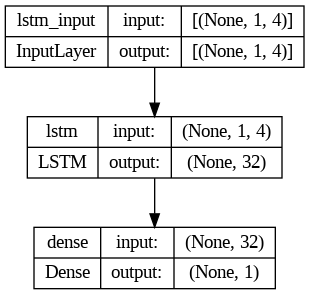

In [14]:
#Building the LSTM Model
import tensorflow as tf
lstm = tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(tf.keras.layers.Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
tf.keras.utils.plot_model(lstm, show_shapes=True, show_layer_names=True)

In [15]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
543/543 [==============================] - 6s 5ms/step - loss: 178493.7656
Epoch 2/100
543/543 [==============================] - 2s 4ms/step - loss: 164055.1406
Epoch 3/100
543/543 [==============================] - 2s 4ms/step - loss: 137822.2969
Epoch 4/100
543/543 [==============================] - 3s 5ms/step - loss: 107727.5625
Epoch 5/100
543/543 [==============================] - 3s 5ms/step - loss: 79196.4531
Epoch 6/100
543/543 [==============================] - 3s 6ms/step - loss: 55295.8359
Epoch 7/100
543/543 [==============================] - 4s 7ms/step - loss: 37382.8516
Epoch 8/100
543/543 [==============================] - 3s 5ms/step - loss: 25387.8359
Epoch 9/100
543/543 [==============================] - 2s 4ms/step - loss: 18187.1113
Epoch 10/100
543/543 [==============================] - 3s 6ms/step - loss: 14162.2705
Epoch 11/100
543/543 [==============================] - 2s 4ms/step - loss: 11794.8555
Epoch 12/100
543/543 [==========================

In [16]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

14/14 [==============================] - 0s 3ms/step


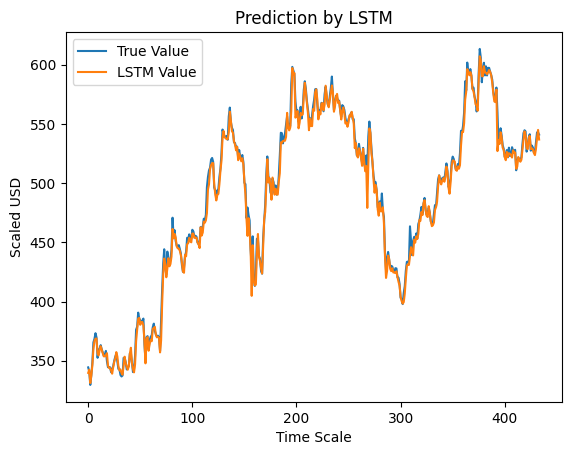

In [17]:
#Predicted vs True Adj Close Value – LSTM
import matplotlib.pyplot as plt
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()